In [1]:
import tensorflow as tf
import pygame
from skimage.transform import resize
from skimage.io import imsave, imread
import matplotlib.pyplot as plt
import sys
import cv2
import numpy as np
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

pygame 2.3.0 (SDL 2.24.2, Python 3.11.4)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [2]:
x_train = abs(x_train.reshape(x_train.shape[0], 28, 28, 1))
x_test = abs(x_test.reshape(x_test.shape[0], 28, 28, 1))
input_shape = (28, 28, 1)
# Making sure that the values are float so that we can get decimal points after division
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# Normalizing the RGB codes by dividing it to the max RGB value.
x_train /= 255
x_test /= 255
x_train = np.ceil(x_train.reshape(x_train.shape[0], 28, 28, 1))
x_test = np.ceil(x_test.reshape(x_test.shape[0], 28, 28, 1))
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


In [3]:
# Importing the required Keras modules containing model and layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
# Creating a Sequential Model and adding the layers
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

In [4]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(x=x_train,y=y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 18s 9ms/step - loss: 0.2292 - accuracy: 0.9297
Epoch 2/5
1875/1875 [==============================] - 17s 9ms/step - loss: 0.1049 - accuracy: 0.9682
Epoch 3/5
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0762 - accuracy: 0.9765
Epoch 4/5
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0562 - accuracy: 0.9823
Epoch 5/5
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0450 - accuracy: 0.9854


In [6]:
x_test[0].reshape(28,28,1)

array([[[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.]],

       [[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.]],

       [[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
  

1/1 [==============================] - 0s 93ms/step
9


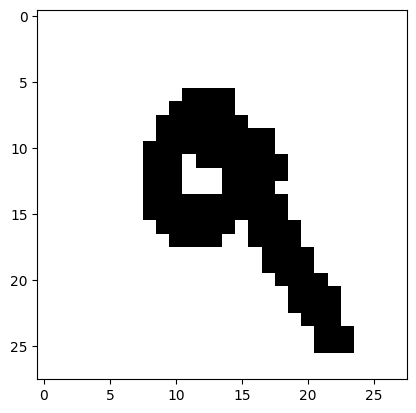

In [5]:
image_index = 7
import matplotlib.pyplot as plt
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1))
print(pred.argmax())

In [8]:
x_test[1000]

array([[[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.]],

       [[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.]],

       [[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
  

In [8]:
import pygame
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Initialize Pygame
pygame.init()

# Set up the window
WINDOW_WIDTH = 784
WINDOW_HEIGHT = 784
screen = pygame.display.set_mode((WINDOW_WIDTH, WINDOW_HEIGHT))
pygame.display.set_caption("Paint Program")

# Define colors
BLACK = (0, 0, 0)
WHITE = (255, 255, 255)

# Set up the grid
GRID_SIZE = 28
CELL_SIZE = 28
grid = [[0 for _ in range(GRID_SIZE)] for _ in range(GRID_SIZE)]

# Draw the grid
def drawGrid():
    for x in range(0, WINDOW_WIDTH, CELL_SIZE):
        for y in range(0, WINDOW_HEIGHT, CELL_SIZE):
            rect = pygame.Rect(x, y, CELL_SIZE, CELL_SIZE)

# Handle mouse events
def handleMouseEvents():
    mouse_position = pygame.mouse.get_pos()
    x = mouse_position[0] // CELL_SIZE
    y = mouse_position[1] // CELL_SIZE
    if pygame.mouse.get_pressed()[0] == 1:
        grid[y][x] = 1
    elif pygame.mouse.get_pressed()[2] == 1:
        grid[y][x] = 0

# Main loop
clock = pygame.time.Clock()
running = True
while running:
    clock.tick(60)
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            running = False
    screen.fill(BLACK)
    drawGrid()
    handleMouseEvents()
    for x in range(GRID_SIZE):
        for y in range(GRID_SIZE):
            if grid[y][x] == 1:
                rect = pygame.Rect(x * CELL_SIZE, y * CELL_SIZE, 2*CELL_SIZE, 2*CELL_SIZE)
                pygame.draw.rect(screen, WHITE, rect)
    pygame.display.flip()

arr = pygame.surfarray.array3d(screen)
data = cv2.cvtColor(arr, cv2.COLOR_BGR2GRAY)
res = cv2.resize(data, dsize=(28, 28))
res = np.flipud(res)
res = np.rot90(res, 3)
pred = model.predict(res.reshape(1, 28, 28, 1))
print(f"The CNN guessed the number is : {pred.argmax()}")
pygame.quit()


1/1 [==============================] - 0s 22ms/step
The CNN guessed the number is : 8


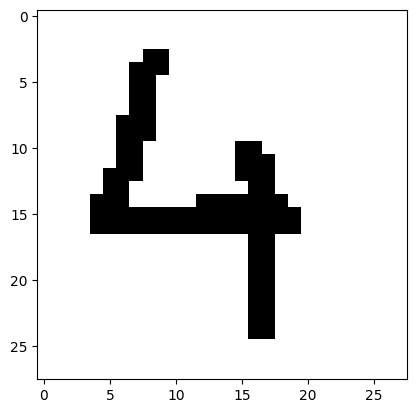

In [10]:
plt.imshow(res,cmap='Greys')

6


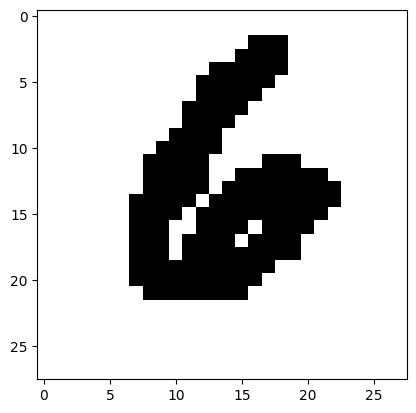

In [11]:
num = 13
plt.imshow(x_train[num],cmap='Greys')
print(y_train[num])